In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## JSON to CSV

In [ ]:
import json
import os
from os import listdir
from os.path import isfile, join
import pandas as pd

path = '/content/drive/Shared drives/YES24/YES24 정리폴더/0. 전처리/'

### log

In [ ]:
# files: 디렉토리 안의 파일 목록의 리스트
files = [f for f in listdir('/content/drive/Shared drives/YES24/2020-06-10/m3/m3_click_stream/') if isfile(join('/content/drive/Shared drives/YES24/2020-06-10/m3/m3_click_stream/', f))]

# json_files: 파일 목록 DataFrame
json_files = pd.DataFrame({"file_id" : files})

# 초기 dataframe 형태 잡기 [칼럼]
with open('/content/drive/Shared drives/YES24/2020-06-10/m3/m3_click_stream/'+json_files['file_id'][0], encoding = 'utf-8') as f:
        log = pd.DataFrame(json.loads(line) for line in f)

# json file 목록을 읽으며
# 각 파일의 json 형태로 저장된 txt 파일을 DataFrame으로 형변환 한 후
# concat를 통해 전체 데이터프레임 형성

# 로그 데이터는 너무 많아서 예시로...파일 10개 중 5개로 한정 [len(json_files)-1 > 5]
for i in range(5):
    with open('/content/drive/Shared drives/YES24/2020-06-10/m3/m3_click_stream/'+json_files['file_id'][i+1], encoding = 'utf-8') as f:
        tmp = pd.DataFrame(json.loads(line) for line in f)
    log = pd.concat([log, tmp])

In [ ]:
log.head()

request_date_time  account_id device_type  product_id  before_product_id
0  2020-03-14 10:39:45      101496           M    88429694                  0
1  2020-03-24 15:33:35      101496           M    64694842                  0
2  2019-12-31 09:54:33      101496           M    81503945                  0
3  2019-12-31 09:52:14      101496           M    84434768                  0
4  2019-12-31 09:52:25      101496           M    81503945                  0

In [ ]:
log.shape

(24105214, 5)

In [ ]:
log.to_csv(path + 'log.csv', encoding = 'utf-8-sig')

### Accounts

In [ ]:
# files: 디렉토리 안의 파일 목록의 리스트
files = [f for f in listdir('/content/drive/Shared drives/YES24/2020-06-10/m3/m3_accounts/') if isfile(join('/content/drive/Shared drives/YES24/2020-06-10/m3/m3_accounts/', f))]

# json_files: 파일 목록 DataFrame
json_files = pd.DataFrame({"file_id" : files})

# 초기 dataframe 형태 잡기 [칼럼]
with open('/content/drive/Shared drives/YES24/2020-06-10/m3/m3_accounts/'+json_files['file_id'][0], encoding = 'utf-8') as f:
        accounts = pd.DataFrame(json.loads(line) for line in f)

# json file 목록을 읽으며
# 각 파일의 json 형태로 저장된 txt 파일을 DataFrame으로 형변환 한 후
# concat를 통해 전체 데이터프레임 형성
for i in range(len(json_files)-1):
    with open('/content/drive/Shared drives/YES24/2020-06-10/m3/m3_accounts/'+json_files['file_id'][i+1], encoding = 'utf-8') as f:
        tmp = pd.DataFrame(json.loads(line) for line in f)
    accounts = pd.concat([accounts, tmp])

In [ ]:
accounts.head()

account_id gender  ...                          address last_login_dts
0      100986      M  ...  경기도 수원시 영통구 하동 994 광교호수마을참누리레이크   1.586492e+12
1      102793      F  ...                      대구 수성구 만촌2동   1.586596e+12
2      102960      F  ...                       경남 양산시 하북면   1.575587e+12
3      105153      F  ...                      부산시 금정구 서2동   1.589554e+12
4      106535      F  ...                      서울 강남구 역삼동    1.578967e+12

[5 rows x 6 columns]

In [ ]:
accounts.shape

(1741578, 6)

In [ ]:
accounts.to_csv(path + 'accounts.csv', encoding = 'utf-8-sig')

### Products

In [ ]:
# files: 디렉토리 안의 파일 목록의 리스트
files = [f for f in listdir('/content/drive/Shared drives/YES24/2020-06-10/m3/all_products/') if isfile(join('/content/drive/Shared drives/YES24/2020-06-10/m3/all_products/', f))]

# json_files: 파일 목록 DataFrame
json_files = pd.DataFrame({"file_id" : files})

# 초기 dataframe 형태 잡기 [칼럼]
with open('/content/drive/Shared drives/YES24/2020-06-10/m3/all_products/'+json_files['file_id'][0], encoding = 'utf-8') as f:
        products = pd.DataFrame(json.loads(line) for line in f)

# json file 목록을 읽으며
# 각 파일의 json 형태로 저장된 txt 파일을 DataFrame으로 형변환 한 후
# concat를 통해 전체 데이터프레임 형성
for i in range(len(json_files)-1):
    with open('/content/drive/Shared drives/YES24/2020-06-10/m3/all_products/'+json_files['file_id'][i+1], encoding = 'utf-8') as f:
        tmp = pd.DataFrame(json.loads(line) for line in f)
    products = pd.concat([products, tmp])

In [ ]:
products.head()

product_id  ...  maker_name
0    43528701  ...      생명의말씀사
1    43528730  ...    계명대학교출판부
2    43528779  ...      생명의말씀사
3    43528822  ...      생명의말씀사
4    43528824  ...  서울대학교출판문화원

[5 rows x 6 columns]

In [ ]:
products.shape

(1745066, 6)

In [ ]:
products.to_csv(path + 'products.csv', encoding = 'utf-8-sig')

###Orders

In [ ]:
# files: 디렉토리 안의 파일 목록의 리스트
files = [f for f in listdir('/content/drive/Shared drives/YES24/2020-06-10/m3/m3_orders/') if isfile(join('/content/drive/Shared drives/YES24/2020-06-10/m3/m3_orders/', f))]

# json_files: 파일 목록 DataFrame
json_files = pd.DataFrame({"file_id" : files})

# 초기 dataframe 형태 잡기 [칼럼]
with open('/content/drive/Shared drives/YES24/2020-06-10/m3/m3_orders/'+json_files['file_id'][0], encoding = 'utf-8') as f:
        orders = pd.DataFrame(json.loads(line) for line in f)

# json file 목록을 읽으며
# 각 파일의 json 형태로 저장된 txt 파일을 DataFrame으로 형변환 한 후
# concat를 통해 전체 데이터프레임 형성
for i in range(len(json_files)-1):
    with open('/content/drive/Shared drives/YES24/2020-06-10/m3/m3_orders/'+json_files['file_id'][i+1], encoding = 'utf-8') as f:
        tmp = pd.DataFrame(json.loads(line) for line in f)
    orders = pd.concat([orders, tmp])

In [ ]:
orders.head()

order_id  account_id  product_id    price     created_at
0  218519157      100777    84936431  10800.0  1585273295643
1  221364615      100777    23116461   6300.0  1588498287633
2  218519157      100777    86641767  14850.0  1585273295643
3  223489288      100777     6315392  10800.0  1591161710237
4  218519157      100777    85010480  43200.0  1585273295643

In [ ]:
orders.shape

(8382514, 5)

In [ ]:
orders.to_csv(path + 'orders.csv', encoding = 'utf-8-sig')

## 전처리

In [ ]:
import pandas as pd
import os
path = '/content/drive/Shared drives/YES24/YES24 정리폴더/0. 전처리/'
import numpy as np

from datetime import datetime
import datetime
from dateutil.parser import parse
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

## Accounts

In [ ]:
accounts = pd.read_csv('/content/drive/Shared drives/YES24/YES24 정리폴더/0. 전처리/accounts.csv')
accounts.drop('Unnamed: 0', axis=1, inplace=True)
accounts.dropna(inplace=True)

#### accounts: 최근 접속 일자 변환

In [ ]:
accounts['last_login_dts'] = pd.to_datetime(accounts['last_login_dts']*1000000)
accounts.dropna(inplace=True)

In [ ]:
accounts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1669171 entries, 0 to 1741577
Data columns (total 6 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   account_id      1669171 non-null  int64         
 1   gender          1669171 non-null  object        
 2   age             1669171 non-null  float64       
 3   zip_code        1669171 non-null  object        
 4   address         1669171 non-null  object        
 5   last_login_dts  1669171 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 89.1+ MB


In [ ]:
accounts['last_login'] = accounts['last_login_dts'].apply(lambda x: datetime.strftime(x, '%Y-%m-%d %H:%M:%S'))
accounts['last_login'] = pd.to_datetime(accounts['last_login'])

In [ ]:
accounts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1669171 entries, 0 to 1741577
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   account_id      1669171 non-null  int64         
 1   gender          1669171 non-null  object        
 2   age             1669171 non-null  float64       
 3   zip_code        1669171 non-null  object        
 4   address         1669171 non-null  object        
 5   last_login_dts  1669171 non-null  datetime64[ns]
 6   last_login      1669171 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(3)
memory usage: 101.9+ MB


In [ ]:
accounts.head()

account_id gender  ...      last_login_dts          last_login
0      100986      M  ... 2020-04-10 04:06:03 2020-04-10 04:06:03
1      102793      F  ... 2020-04-11 09:10:04 2020-04-11 09:10:04
2      102960      F  ... 2019-12-05 23:02:47 2019-12-05 23:02:47
4      106535      F  ... 2020-01-14 01:51:32 2020-01-14 01:51:32
5      106783      F  ... 2020-04-21 07:04:51 2020-04-21 07:04:51

[5 rows x 7 columns]

#### accounts: gender 변환

In [ ]:
accounts.gender.unique()

array(['M', 'F', '-', '0'], dtype=object)

In [ ]:
accounts['gender'].replace(to_replace = '-', value = np.nan, inplace = True)
accounts['gender'].replace(to_replace = '0', value = np.nan, inplace = True)

In [ ]:
accounts.dropna(inplace=True)
accounts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1669169 entries, 0 to 1741577
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   account_id      1669169 non-null  int64         
 1   gender          1669169 non-null  object        
 2   age             1669169 non-null  float64       
 3   zip_code        1669169 non-null  object        
 4   address         1669169 non-null  object        
 5   last_login_dts  1669169 non-null  datetime64[ns]
 6   last_login      1669169 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(3)
memory usage: 101.9+ MB


In [ ]:
accounts.gender.unique()

array([ 1.,  0., nan])

In [ ]:
accounts['gender'] = pd.DataFrame(encoder.fit_transform(accounts['gender']))

In [ ]:
accounts['gender']

0          1.0
1          0.0
2          0.0
4          0.0
5          1.0
          ... 
1741572    NaN
1741573    NaN
1741575    NaN
1741576    NaN
1741577    NaN
Name: gender, Length: 1669169, dtype: float64

In [ ]:
accounts.dropna(inplace=True)
accounts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599921 entries, 0 to 1669168
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   account_id      1599921 non-null  int64         
 1   gender          1599921 non-null  float64       
 2   age             1599921 non-null  float64       
 3   zip_code        1599921 non-null  object        
 4   address         1599921 non-null  object        
 5   last_login_dts  1599921 non-null  datetime64[ns]
 6   last_login      1599921 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1), object(2)
memory usage: 97.7+ MB


#### accounts: age 변환

In [ ]:
accounts.age.unique()

array([ 43.,  40.,  57.,  45.,  52.,  49.,  48.,  46.,  47.,  42.,  41.,
        37.,  35.,  66.,  56.,  44.,  50.,  51.,  34.,  58.,  72.,  59.,
        53.,  36.,  74.,  54.,  55.,  61.,  39.,  63.,  38.,  32.,  69.,
        65.,  64.,  30.,  60.,  62.,  75.,  31.,  33.,  29.,  67.,  17.,
        73.,  28.,  26.,  27.,  24.,  77.,  68.,  70.,  25.,  79.,  76.,
        23.,  85.,  21.,  18.,  20.,  22.,  12.,  19.,  14.,  71.,  11.,
        15., 100.,  16.,  81.,  13.,  -1.,  86.,  10.,  80.,   8.,   9.,
        83.,  78.,  94.,  82.,  90.,  95.,  88.,   4.,  87.,  89.,  84.,
        91.,  93.,  92.,  96.,  98.,  99.,   6.,   5.,  97.,   7.,   2.,
         3.])

In [ ]:
accounts['age'].replace(to_replace = -1, value = np.nan, inplace = True)
accounts['age'] = accounts['age'].apply(lambda x : np.nan if x <=7 else x)

In [ ]:
accounts.dropna(inplace=True)
accounts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599751 entries, 0 to 1669168
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   account_id      1599751 non-null  int64         
 1   gender          1599751 non-null  float64       
 2   age             1599751 non-null  float64       
 3   zip_code        1599751 non-null  object        
 4   address         1599751 non-null  object        
 5   last_login_dts  1599751 non-null  datetime64[ns]
 6   last_login      1599751 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1), object(2)
memory usage: 97.6+ MB


#### accounts: 주소

In [ ]:
accounts['address'][0].split(' ')[0]

'경기도'

In [ ]:
accounts['address_is'] = accounts['address'].apply(lambda x: 0 if '경기' in x.split(' ')[0] else 1  if '인천' in x.split(' ')[0] else 1 if '서울' in x.split(' ')[0] else 1)

In [ ]:
accounts.dropna(inplace=True)
accounts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599751 entries, 0 to 1669168
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   account_id  1599751 non-null  int64         
 1   gender      1599751 non-null  float64       
 2   age         1599751 non-null  float64       
 3   address     1599751 non-null  object        
 4   address_is  1599751 non-null  int64         
 5   last_login  1599751 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 85.4+ MB


#### 저장

In [ ]:
path = '/content/drive/Shared drives/YES24/YES24 정리폴더/0. 전처리/'

In [ ]:
accounts = accounts[['account_id','gender','age','address','address_is','last_login']]
accounts.to_csv(path + 'accounts_preprocessed.csv',encoding='utf-8')

## Orders

In [ ]:
orders = pd.read_csv(path+'orders.csv')
orders.drop('Unnamed: 0',axis=1, inplace=True)

In [ ]:
orders['created_at'][0]

Timestamp('2020-03-27 01:41:36.286000')

In [ ]:
java_timestamp = 1589424016190
seconds = java_timestamp / 1000
sub_seconds = (java_timestamp % 1000.0) / 1000.0
date = datetime.datetime.fromtimestamp(seconds + sub_seconds)
date

datetime.datetime(2020, 5, 14, 2, 40, 16, 380000)

In [ ]:
orders['created_at'] = orders['created_at'].apply(lambda x : datetime.datetime.fromtimestamp((x/1000) + ((x % 1000.0) / 1000.0)))

In [ ]:
orders

order_id  account_id  product_id    price              created_at
0        218519157      100777    84936431  10800.0 2020-03-27 01:41:36.286
1        221364615      100777    23116461   6300.0 2020-05-03 09:31:28.266
2        218519157      100777    86641767  14850.0 2020-03-27 01:41:36.286
3        223489288      100777     6315392  10800.0 2020-06-03 05:21:50.474
4        218519157      100777    85010480  43200.0 2020-03-27 01:41:36.286
...            ...         ...         ...      ...                     ...
8382509  223843200    16987547     3799797   9000.0 2020-06-08 14:50:52.854
8382510  223850682    16988206    73776838  18000.0 2020-06-08 22:09:55.166
8382511  223871729    16989204    90496918  66600.0 2020-06-09 04:48:23.986
8382512  223887913    16990132     7217755  12600.0 2020-06-09 09:12:26.054
8382513  223901153    16990839    80223743  25200.0 2020-06-09 13:29:11.200

[8382514 rows x 5 columns]

In [ ]:
orders.to_csv(path+'orders_preprocessed.csv',encoding='utf-8')

## Products

In [ ]:
products = pd.read_csv(path+'products.csv',dtype={'published_at':str})
products.drop('Unnamed: 0', axis=1, inplace=True)
products.dropna(inplace=True)

In [ ]:
products

product_id  ...    maker_name
0          43528701  ...        생명의말씀사
1          43528730  ...      계명대학교출판부
2          43528779  ...        생명의말씀사
3          43528822  ...        생명의말씀사
4          43528824  ...    서울대학교출판문화원
...             ...  ...           ...
1745061    85352665  ...           성안당
1745062    85353942  ...  PAGODA Books
1745063    85354052  ...           고시넷
1745064    85354327  ...           아울북
1745065    85354780  ...           윌비스

[1725489 rows x 6 columns]

In [ ]:
products['published_at'] = products['published_at'].apply(lambda x : x[0:8] if type(x) == 'str' else x)

In [ ]:
products.isnull().sum()

product_id      0
product_name    0
category_id     0
published_at    0
shop_price      0
maker_name      0
dtype: int64

In [ ]:
products.published_at.value_counts()

20100501    14243
20101005    13467
20110501    13456
20100801     7511
20110801     7298
            ...  
19931108        1
19870505        1
19701231        1
19921110        1
19981228        1
Name: published_at, Length: 9406, dtype: int64

In [ ]:
products['published_at'] = products['published_at'].apply(lambda x : '20991231' if len(x) <8 else x)
products['published_at'] = products['published_at'].astype(str)
products['published_at'] = products['published_at'].apply(lambda x : '20991231' if int(x[4:6]) >= 13 else x )
products['published_at'] = products['published_at'].apply(lambda x : '20111205' if x=='2011125 ' else x)
products['published_at'] = products['published_at'].apply(lambda x : '20991231' if int(x) <= 19000000 else x)

In [ ]:
products['published_at'] = products['published_at'].apply(lambda x : parse(x) )

In [ ]:
products

product_id  ...    maker_name
0          43528701  ...        생명의말씀사
1          43528730  ...      계명대학교출판부
2          43528779  ...        생명의말씀사
3          43528822  ...        생명의말씀사
4          43528824  ...    서울대학교출판문화원
...             ...  ...           ...
1745061    85352665  ...           성안당
1745062    85353942  ...  PAGODA Books
1745063    85354052  ...           고시넷
1745064    85354327  ...           아울북
1745065    85354780  ...           윌비스

[1725489 rows x 6 columns]

In [ ]:
products['category_id'] = products['category_id'].apply(lambda x : str(x)[1:])

In [ ]:
products.isnull().sum()

product_id      0
product_name    0
category_id     0
published_at    0
shop_price      0
maker_name      0
dtype: int64

In [ ]:
products.to_csv(path+'products_preprocessed.csv',encoding='utf-8')

## click

In [ ]:
click = pd.read_csv(path+'log.csv')
click.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
print(click.shape)
click.head()

(30113602, 5)


request_date_time  account_id device_type  product_id  before_product_id
0  2020-03-14 10:39:45      101496           M    88429694                  0
1  2020-03-24 15:33:35      101496           M    64694842                  0
2  2019-12-31 09:54:33      101496           M    81503945                  0
3  2019-12-31 09:52:14      101496           M    84434768                  0
4  2019-12-31 09:52:25      101496           M    81503945                  0

In [ ]:
click['device_type'] = pd.DataFrame(encoder.fit_transform(click['device_type']))

In [ ]:
click.head()

request_date_time  account_id  device_type  product_id  before_product_id
0  2020-03-14 10:39:45      101496            0    88429694                  0
1  2020-03-24 15:33:35      101496            0    64694842                  0
2  2019-12-31 09:54:33      101496            0    81503945                  0
3  2019-12-31 09:52:14      101496            0    84434768                  0
4  2019-12-31 09:52:25      101496            0    81503945                  0

In [ ]:
click.isnull().sum()

request_date_time    0
account_id           0
device_type          0
product_id           0
before_product_id    0
dtype: int64

In [ ]:
click.to_csv(path+'click.csv',encoding='utf-8')

## click 중심 데이터 > orders 중 click없이 구매한 데이터(외부 사이트 이용) 삭제하기
* click 데이터 크기가 방대하여 절반만 사용한 관계로 더 적어짐

In [ ]:
orders = pd.read_csv(path+'orders_preprocessed.csv',encoding='utf-8')

In [ ]:
order_check_account = click['account_id'].unique().tolist()
order_check_product = click['product_id'].unique().tolist()

In [ ]:
order_check_account[:10]

[101496,
 103496,
 104986,
 106002,
 107608,
 108157,
 111343,
 111537,
 112568,
 115150]

In [ ]:
order_check_product[:10]

[88429694,
 64694842,
 81503945,
 84434768,
 86895523,
 60713828,
 2870072,
 69240128,
 72158875,
 61557835]

In [ ]:
orders.shape

(8382514, 6)

In [ ]:
order_check_1 = orders[orders['product_id'].isin(order_check_product)]

In [ ]:
order_check_1.shape

(8344774, 6)

In [ ]:
order_check_2 = order_check_1[order_check_1['account_id'].isin(order_check_account)]

In [ ]:
order_check_2.shape

(4035057, 5)

In [ ]:
order_check_2 = order_check_2.iloc[:,1:]

In [ ]:
order_check_2.to_csv(path+'orders_only_in_clicks.csv',encoding='utf-8')

## 기타 전처리

In [ ]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
import os
path = '/content/drive/Shared drives/YES24/YES24 정리폴더/0. 전처리/'
import numpy as np

from datetime import datetime
import datetime
from dateutil.parser import parse
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

### 신구 선호도_orders 3,4/5

In [ ]:
products = pd.read_csv(path+'products_preprocessed.csv',dtype={'category_id':str})
products.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
products['published_at'] = products['published_at'].apply(lambda x: str(x))

In [ ]:
products.published_at[0][0:4]

'2017'

In [ ]:
products['pub_newold'] = products['published_at'].apply(lambda x: 1 if x[0:4] == '2020' else 0)

In [ ]:
products.dropna(inplace=True)

In [ ]:
products.isnull().sum()

product_id      0
product_name    0
category_id     0
published_at    0
shop_price      0
maker_name      0
pub_newold      0
dtype: int64

In [ ]:
orders = pd.read_csv(path+'orders_only_in_clicks.csv')
orders.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
orders

order_id  account_id  product_id    price               created_at
0        222798861      104533    89967507  48600.0  2020-05-24 13:16:05.020
1        217109953      104533      234373  18000.0  2020-03-11 13:59:53.880
2        220523812      106728    38972963  12600.0  2020-04-21 08:15:15.880
3        220523812      106728    69645132   9000.0  2020-04-21 08:15:15.880
4        216465952      106728     8157957  13320.0  2020-03-04 09:19:32.886
...            ...         ...         ...      ...                      ...
4035052  223483054    16953846    80316984  13320.0  2020-06-03 03:43:53.934
4035053  223483054    16953846    90224643  11700.0  2020-06-03 03:43:53.934
4035054  223229840    16957506    74404574  24300.0  2020-05-31 00:30:02.794
4035055  223264662    16959433    89340888  10800.0  2020-05-31 11:21:13.040
4035056  223300646    16960301    89315958  13050.0  2020-05-31 15:27:44.134

[4035057 rows x 5 columns]

In [ ]:
orders['created_at']= orders['created_at'].astype('datetime64[ns]')

In [ ]:
orders['created_at'][0].date()

datetime.date(2020, 5, 24)

In [ ]:
train_date = datetime.date(2020, 4, 30)

In [ ]:
orders['train'] = orders['created_at'].apply(lambda x: np.nan if x.date() > train_date else x)

In [ ]:
orders

order_id  account_id  ...              created_at                   train
0        222798861      104533  ... 2020-05-24 13:16:05.020                     NaT
1        217109953      104533  ... 2020-03-11 13:59:53.880 2020-03-11 13:59:53.880
2        220523812      106728  ... 2020-04-21 08:15:15.880 2020-04-21 08:15:15.880
3        220523812      106728  ... 2020-04-21 08:15:15.880 2020-04-21 08:15:15.880
4        216465952      106728  ... 2020-03-04 09:19:32.886 2020-03-04 09:19:32.886
...            ...         ...  ...                     ...                     ...
4035052  223483054    16953846  ... 2020-06-03 03:43:53.934                     NaT
4035053  223483054    16953846  ... 2020-06-03 03:43:53.934                     NaT
4035054  223229840    16957506  ... 2020-05-31 00:30:02.794                     NaT
4035055  223264662    16959433  ... 2020-05-31 11:21:13.040                     NaT
4035056  223300646    16960301  ... 2020-05-31 15:27:44.134                     NaT

[4035057 rows x 6 columns]

In [ ]:
orders_train = orders.dropna()

In [ ]:
orders_train

order_id  account_id  ...              created_at                   train
1        217109953      104533  ... 2020-03-11 13:59:53.880 2020-03-11 13:59:53.880
2        220523812      106728  ... 2020-04-21 08:15:15.880 2020-04-21 08:15:15.880
3        220523812      106728  ... 2020-04-21 08:15:15.880 2020-04-21 08:15:15.880
4        216465952      106728  ... 2020-03-04 09:19:32.886 2020-03-04 09:19:32.886
5        216465952      106728  ... 2020-03-04 09:19:32.886 2020-03-04 09:19:32.886
...            ...         ...  ...                     ...                     ...
4034973  221116360    16830266  ... 2020-04-29 05:49:28.040 2020-04-29 05:49:28.040
4034974  221164923    16834484  ... 2020-04-30 02:05:54.086 2020-04-30 02:05:54.086
4034975  221164923    16834484  ... 2020-04-30 02:05:54.086 2020-04-30 02:05:54.086
4034976  221164923    16834484  ... 2020-04-30 02:05:54.086 2020-04-30 02:05:54.086
4034977  221185401    16836022  ... 2020-04-30 09:39:54.926 2020-04-30 09:39:54.926

[2814983 rows x 6 columns]

In [ ]:
orders_products_train = pd.merge(orders_train, products, on='product_id',how='left')

In [ ]:
orders_products_train.isnull().sum()

order_id           0
account_id         0
product_id         0
price              0
created_at         0
train              0
product_name    1144
category_id     1144
published_at    1144
shop_price      1144
maker_name      1144
pub_newold      1144
dtype: int64

In [ ]:
orders_products_train.dropna(inplace=True)

In [ ]:
preference = pd.DataFrame(orders_products_train.groupby('account_id')['pub_newold'].agg('mean'))
preference.reset_index(inplace=True)
preference.rename(columns = {'pub_newold':'new_preference'}, inplace=True)

In [ ]:
preference.new_preference.value_counts()

0.000000    345852
1.000000     97044
0.500000     45135
0.333333     27971
0.250000     18622
             ...  
0.106061         1
0.963855         1
0.891892         1
0.109375         1
0.438202         1
Name: new_preference, Length: 957, dtype: int64

In [ ]:
preference

account_id  new_preference
0           100004        0.000000
1           100033        0.333333
2           100039        0.083333
3           100058        0.000000
4           100062        0.000000
...            ...             ...
656493    16837769        1.000000
656494    16837782        0.000000
656495    16837788        0.000000
656496    16837801        0.000000
656497    16837813        0.000000

[656498 rows x 2 columns]

In [ ]:
orders_preference_train = pd.merge(orders_train, preference, on='account_id', how='left')

In [ ]:
orders_preference_train

order_id  account_id  ...                   train  new_preference
0        217109953      104533  ... 2020-03-11 13:59:53.880        0.000000
1        220523812      106728  ... 2020-04-21 08:15:15.880        0.000000
2        220523812      106728  ... 2020-04-21 08:15:15.880        0.000000
3        216465952      106728  ... 2020-03-04 09:19:32.886        0.000000
4        216465952      106728  ... 2020-03-04 09:19:32.886        0.000000
...            ...         ...  ...                     ...             ...
2814978  221116360    16830266  ... 2020-04-29 05:49:28.040        0.000000
2814979  221164923    16834484  ... 2020-04-30 02:05:54.086        0.333333
2814980  221164923    16834484  ... 2020-04-30 02:05:54.086        0.333333
2814981  221164923    16834484  ... 2020-04-30 02:05:54.086        0.333333
2814982  221185401    16836022  ... 2020-04-30 09:39:54.926        0.000000

[2814983 rows x 7 columns]

In [ ]:
orders['test'] = orders['created_at'].apply(lambda x: np.nan if x.date() < train_date else x)

In [ ]:
orders_test = orders.drop('train',axis=1)
orders_test.dropna(inplace=True)

In [ ]:
orders_test

order_id  account_id  ...              created_at                    test
0        222798861      104533  ... 2020-05-24 13:16:05.020 2020-05-24 13:16:05.020
15       222615397      111175  ... 2020-05-21 11:58:16.834 2020-05-21 11:58:16.834
19       221290735      112001  ... 2020-05-02 01:46:14.146 2020-05-02 01:46:14.146
20       221290735      112001  ... 2020-05-02 01:46:14.146 2020-05-02 01:46:14.146
21       221257972      123138  ... 2020-05-01 09:57:41.120 2020-05-01 09:57:41.120
...            ...         ...  ...                     ...                     ...
4035052  223483054    16953846  ... 2020-06-03 03:43:53.934 2020-06-03 03:43:53.934
4035053  223483054    16953846  ... 2020-06-03 03:43:53.934 2020-06-03 03:43:53.934
4035054  223229840    16957506  ... 2020-05-31 00:30:02.794 2020-05-31 00:30:02.794
4035055  223264662    16959433  ... 2020-05-31 11:21:13.040 2020-05-31 11:21:13.040
4035056  223300646    16960301  ... 2020-05-31 15:27:44.134 2020-05-31 15:27:44.134

[1247285 rows x 6 columns]

In [ ]:
orders_products_test = pd.merge(orders_test, products, on='product_id',how='left')

In [ ]:
orders_products_test.isnull().sum()

order_id          0
account_id        0
product_id        0
price             0
created_at        0
test              0
product_name    592
category_id     592
published_at    592
shop_price      592
maker_name      592
pub_newold      592
dtype: int64

In [ ]:
orders_products_test.dropna(inplace=True)

In [ ]:
preference_test = pd.DataFrame(orders_products_test.groupby('account_id')['pub_newold'].agg('mean'))
preference_test.reset_index(inplace=True)
preference_test.rename(columns = {'pub_newold':'new_preference'}, inplace=True)

In [ ]:
orders_preference_test = pd.merge(orders_test, preference_test, on='account_id', how='left')

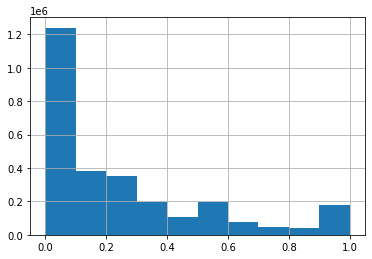

In [ ]:
orders_preference_train.new_preference.hist()

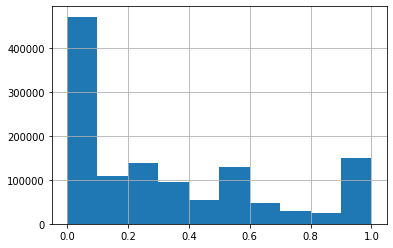

In [ ]:
orders_preference_test.new_preference.hist()

In [ ]:
orders_preference_train['new_pref'] = orders_preference_train['new_preference'].apply(lambda x: 1 if x>=0.5 else 0)
orders_preference_test['new_pref'] = orders_preference_test['new_preference'].apply(lambda x: 1 if x>=0.5 else 0)

In [ ]:
orders_preference_train['new_pref'] = orders_preference_train['new_preference'].apply(lambda x: 1 if x>=0.5 else 0)
orders_preference_test['new_pref'] = orders_preference_test['new_preference'].apply(lambda x: 1 if x>=0.5 else 0)

In [ ]:
orders_preference_train.to_csv(path+'orders_preference_train.csv',encoding='utf-8')
orders_preference_test.to_csv(path+'orders_preference_test.csv',encoding='utf-8')

### 신구 선호도_click 3,4 / 5

In [ ]:
click = pd.read_csv(path+'click.csv')
click.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
click

request_date_time  account_id  ...  product_id  before_product_id
0         2020-03-14 10:39:45      101496  ...    88429694                  0
1         2020-03-24 15:33:35      101496  ...    64694842                  0
2         2019-12-31 09:54:33      101496  ...    81503945                  0
3         2019-12-31 09:52:14      101496  ...    84434768                  0
4         2019-12-31 09:52:25      101496  ...    81503945                  0
...                       ...         ...  ...         ...                ...
30113597  2020-05-30 19:41:49    16956026  ...    81689059                  0
30113598  2020-05-30 19:41:37    16956026  ...    78601025                  0
30113599  2020-05-30 20:53:51    16956257  ...    71741943                  0
30113600  2020-05-31 13:42:35    16958127  ...    89108278                  0
30113601  2020-05-31 13:46:51    16958127  ...    89108278                  0

[30113602 rows x 5 columns]

In [ ]:
click['request_date_time'] = click['request_date_time'].astype('datetime64[ns]')

In [ ]:
start = datetime.date(2020, 3, 1)
train = datetime.date(2020, 5, 1)

In [ ]:
click['train'] = click['request_date_time'].apply(lambda x: np.nan if x.date() < start else x )

In [ ]:
click.dropna(inplace=True)

In [ ]:
click['train'] = click['request_date_time'].apply(lambda x: np.nan if x.date() >= train else x )
click['test'] = click['request_date_time'].apply(lambda x: np.nan if x.date() < train else x )

In [ ]:
click

request_date_time  ...                test
0        2020-03-14 10:39:45  ...                 NaT
1        2020-03-24 15:33:35  ...                 NaT
5        2020-03-14 10:38:03  ...                 NaT
18       2020-05-03 19:42:23  ... 2020-05-03 19:42:23
20       2020-03-24 15:37:17  ...                 NaT
...                      ...  ...                 ...
30113597 2020-05-30 19:41:49  ... 2020-05-30 19:41:49
30113598 2020-05-30 19:41:37  ... 2020-05-30 19:41:37
30113599 2020-05-30 20:53:51  ... 2020-05-30 20:53:51
30113600 2020-05-31 13:42:35  ... 2020-05-31 13:42:35
30113601 2020-05-31 13:46:51  ... 2020-05-31 13:46:51

[17525860 rows x 7 columns]

In [ ]:
click_train = click.drop('test', axis=1)
click_train.dropna(inplace=True)

In [ ]:
click_test = click.drop('train',axis=1)
click_test.dropna(inplace=True)

In [ ]:
click_product_train = pd.merge(click_train,products,on='product_id',how='left')
click_product_train.dropna(inplace=True)

In [ ]:
click_product_test = pd.merge(click_test,products,on='product_id',how='left')
click_product_test.dropna(inplace=True)

In [ ]:
click_product_train

request_date_time  account_id  ...     maker_name  pub_newold
0        2020-03-14 10:39:45      101496  ...             해냄         1.0
1        2020-03-24 15:33:35      101496  ...             해냄         0.0
2        2020-03-14 10:38:03      101496  ...            시공사         1.0
3        2020-03-24 15:37:17      101496  ...           수오서재         1.0
4        2020-03-25 08:49:08      101496  ...           문학동네         0.0
...                      ...         ...  ...            ...         ...
12855272 2020-04-30 10:52:32    16831095  ...  동양북스(동양books)         0.0
12855273 2020-04-29 19:08:00    16831095  ...  동양북스(동양books)         0.0
12855274 2020-04-29 22:33:41    16833112  ...          와이미디어         1.0
12855275 2020-04-30 12:01:19    16833112  ...          학산문화사         1.0
12855276 2020-04-29 22:33:56    16833112  ...          학산문화사         1.0

[12848214 rows x 12 columns]

In [ ]:
preference_train = pd.DataFrame(click_product_train.groupby('account_id')['pub_newold'].agg('mean'))
preference_train.reset_index(inplace=True)
preference_train.rename(columns = {'pub_newold':'new_preference'}, inplace=True)

In [ ]:
preference_test = pd.DataFrame(click_product_test.groupby('account_id')['pub_newold'].agg('mean'))
preference_test.reset_index(inplace=True)
preference_test.rename(columns = {'pub_newold':'new_preference'}, inplace=True)

In [ ]:
preference_train

account_id  new_preference
0           100004        0.090909
1           100033        0.400000
2           100039        0.173913
3           100058        0.250000
4           100062        0.136364
...            ...             ...
682062    16837187        0.500000
682063    16837199        1.000000
682064    16837200        0.000000
682065    16837210        0.000000
682066    16837224        0.500000

[682067 rows x 2 columns]

In [ ]:
click_preference_train = pd.merge(click_product_train,preference_train, on='account_id',how='left')

In [ ]:
click_preference_test = pd.merge(click_product_test,preference_test, on='account_id',how='left')

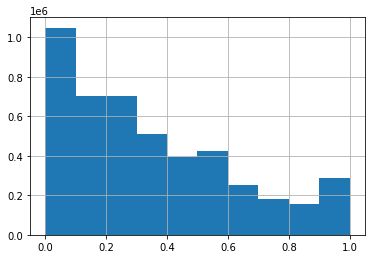

In [ ]:
click_preference_test.new_preference.hist()

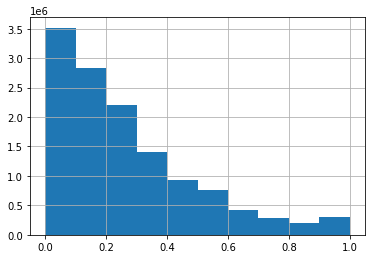

In [ ]:
click_preference_train.new_preference.hist()

In [ ]:
click_preference_train['new_pref'] = click_preference_train['new_preference'].apply(lambda x: 1 if x>=0.5 else 0)
click_preference_test['new_pref'] = click_preference_test['new_preference'].apply(lambda x: 1 if x>=0.5 else 0)

In [ ]:
click_preference_train['new_pref'] = click_preference_train['new_preference'].apply(lambda x: 1 if x>=0.5 else 0)
click_preference_test['new_pref'] = click_preference_test['new_preference'].apply(lambda x: 1 if x>=0.5 else 0)

In [ ]:
click_preference_train.to_csv(path+'click_preference_train.csv',encoding='utf-8')
click_preference_test.to_csv(path+'click_preference_test.csv',encoding='utf-8')

### 카테고리 선호도

In [ ]:
click_preference_train

request_date_time  account_id  ...  new_preference  new_pref
0        2020-03-14 10:39:45      101496  ...            0.38         0
1        2020-03-24 15:33:35      101496  ...            0.38         0
2        2020-03-14 10:38:03      101496  ...            0.38         0
3        2020-03-24 15:37:17      101496  ...            0.38         0
4        2020-03-25 08:49:08      101496  ...            0.38         0
...                      ...         ...  ...             ...       ...
12848209 2020-04-30 10:52:32    16831095  ...            0.00         0
12848210 2020-04-29 19:08:00    16831095  ...            0.00         0
12848211 2020-04-29 22:33:41    16833112  ...            1.00         1
12848212 2020-04-30 12:01:19    16833112  ...            1.00         1
12848213 2020-04-29 22:33:56    16833112  ...            1.00         1

[12848214 rows x 14 columns]

In [ ]:
click_preference_test

request_date_time  account_id  ...  new_preference  new_pref
0       2020-05-03 19:42:23      101496  ...            0.50         1
1       2020-05-08 20:38:39      101496  ...            0.50         1
2       2020-05-03 19:49:32      101496  ...            0.50         1
3       2020-05-03 19:47:30      101496  ...            0.50         1
4       2020-05-03 19:42:58      101496  ...            0.50         1
...                     ...         ...  ...             ...       ...
4668092 2020-05-30 19:41:49    16956026  ...            0.00         0
4668093 2020-05-30 19:41:37    16956026  ...            0.00         0
4668094 2020-05-30 20:53:51    16956257  ...            0.00         0
4668095 2020-05-31 13:42:35    16958127  ...            1.00         1
4668096 2020-05-31 13:46:51    16958127  ...            1.00         1

[4668097 rows x 14 columns]

### 활동시간

In [ ]:
click_preference_train

request_date_time  account_id  ...  new_preference  new_pref
0        2020-03-14 10:39:45      101496  ...            0.38         0
1        2020-03-24 15:33:35      101496  ...            0.38         0
2        2020-03-14 10:38:03      101496  ...            0.38         0
3        2020-03-24 15:37:17      101496  ...            0.38         0
4        2020-03-25 08:49:08      101496  ...            0.38         0
...                      ...         ...  ...             ...       ...
12848209 2020-04-30 10:52:32    16831095  ...            0.00         0
12848210 2020-04-29 19:08:00    16831095  ...            0.00         0
12848211 2020-04-29 22:33:41    16833112  ...            1.00         1
12848212 2020-04-30 12:01:19    16833112  ...            1.00         1
12848213 2020-04-29 22:33:56    16833112  ...            1.00         1

[12848214 rows x 14 columns]

In [ ]:
click_preference_test

request_date_time  account_id  ...  new_preference  new_pref
0       2020-05-03 19:42:23      101496  ...            0.50         1
1       2020-05-08 20:38:39      101496  ...            0.50         1
2       2020-05-03 19:49:32      101496  ...            0.50         1
3       2020-05-03 19:47:30      101496  ...            0.50         1
4       2020-05-03 19:42:58      101496  ...            0.50         1
...                     ...         ...  ...             ...       ...
4668092 2020-05-30 19:41:49    16956026  ...            0.00         0
4668093 2020-05-30 19:41:37    16956026  ...            0.00         0
4668094 2020-05-30 20:53:51    16956257  ...            0.00         0
4668095 2020-05-31 13:42:35    16958127  ...            1.00         1
4668096 2020-05-31 13:46:51    16958127  ...            1.00         1

[4668097 rows x 14 columns]

### 접속 기기

In [ ]:
click_preference_train

request_date_time  account_id  ...  new_preference  new_pref
0        2020-03-14 10:39:45      101496  ...            0.38         0
1        2020-03-24 15:33:35      101496  ...            0.38         0
2        2020-03-14 10:38:03      101496  ...            0.38         0
3        2020-03-24 15:37:17      101496  ...            0.38         0
4        2020-03-25 08:49:08      101496  ...            0.38         0
...                      ...         ...  ...             ...       ...
12848209 2020-04-30 10:52:32    16831095  ...            0.00         0
12848210 2020-04-29 19:08:00    16831095  ...            0.00         0
12848211 2020-04-29 22:33:41    16833112  ...            1.00         1
12848212 2020-04-30 12:01:19    16833112  ...            1.00         1
12848213 2020-04-29 22:33:56    16833112  ...            1.00         1

[12848214 rows x 14 columns]

In [ ]:
click_preference_test

request_date_time  account_id  ...  new_preference  new_pref
0       2020-05-03 19:42:23      101496  ...            0.50         1
1       2020-05-08 20:38:39      101496  ...            0.50         1
2       2020-05-03 19:49:32      101496  ...            0.50         1
3       2020-05-03 19:47:30      101496  ...            0.50         1
4       2020-05-03 19:42:58      101496  ...            0.50         1
...                     ...         ...  ...             ...       ...
4668092 2020-05-30 19:41:49    16956026  ...            0.00         0
4668093 2020-05-30 19:41:37    16956026  ...            0.00         0
4668094 2020-05-30 20:53:51    16956257  ...            0.00         0
4668095 2020-05-31 13:42:35    16958127  ...            1.00         1
4668096 2020-05-31 13:46:51    16958127  ...            1.00         1

[4668097 rows x 14 columns]

### 나이

In [ ]:
accounts = pd.read_csv(path+'accounts_preprocessed.csv')
accounts.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
accounts

account_id  gender  ...  address_is           last_login
0            100986    1.00  ...           0  2020-04-10 04:06:03
1            102793    0.00  ...           1  2020-04-11 09:10:04
2            102960    0.00  ...           1  2019-12-05 23:02:47
3            106535    0.00  ...           1  2020-01-14 01:51:32
4            106783    1.00  ...           1  2020-04-21 07:04:51
...             ...     ...  ...         ...                  ...
1599746    11124898    0.00  ...           0  2020-05-28 00:10:52
1599747    11126427    1.00  ...           0  2020-05-20 06:15:05
1599748    11129947    1.00  ...           1  2020-02-04 11:32:23
1599749    11131300    0.00  ...           1  2020-05-08 07:29:31
1599750    11135661    0.00  ...           1  2020-03-17 01:40:40

[1599751 rows x 6 columns]

### 관여도

In [ ]:
click_train

request_date_time  account_id  ...  before_product_id               train
0        2020-03-14 10:39:45      101496  ...                  0 2020-03-14 10:39:45
1        2020-03-24 15:33:35      101496  ...                  0 2020-03-24 15:33:35
5        2020-03-14 10:38:03      101496  ...                  0 2020-03-14 10:38:03
20       2020-03-24 15:37:17      101496  ...                  0 2020-03-24 15:37:17
21       2020-03-25 08:49:08      101496  ...                  0 2020-03-25 08:49:08
...                      ...         ...  ...                ...                 ...
30112792 2020-04-30 10:52:32    16831095  ...            7480625 2020-04-30 10:52:32
30112795 2020-04-29 19:08:00    16831095  ...                  0 2020-04-29 19:08:00
30112801 2020-04-29 22:33:41    16833112  ...                  0 2020-04-29 22:33:41
30112802 2020-04-30 12:01:19    16833112  ...                  0 2020-04-30 12:01:19
30112803 2020-04-29 22:33:56    16833112  ...           90071962 2020-04-29 22:33:56

[12855277 rows x 6 columns]

In [ ]:
click_test

request_date_time  account_id  ...  before_product_id                test
18       2020-05-03 19:42:23      101496  ...                  0 2020-05-03 19:42:23
26       2020-05-08 20:38:39      101496  ...            4052128 2020-05-08 20:38:39
27       2020-05-03 19:49:32      101496  ...                  0 2020-05-03 19:49:32
36       2020-05-03 19:47:30      101496  ...                  0 2020-05-03 19:47:30
39       2020-05-03 19:42:58      101496  ...                  0 2020-05-03 19:42:58
...                      ...         ...  ...                ...                 ...
30113597 2020-05-30 19:41:49    16956026  ...                  0 2020-05-30 19:41:49
30113598 2020-05-30 19:41:37    16956026  ...                  0 2020-05-30 19:41:37
30113599 2020-05-30 20:53:51    16956257  ...                  0 2020-05-30 20:53:51
30113600 2020-05-31 13:42:35    16958127  ...                  0 2020-05-31 13:42:35
30113601 2020-05-31 13:46:51    16958127  ...                  0 2020-05-31 13:46:51

[4670583 rows x 6 columns]

In [ ]:
orders_train

order_id  account_id  ...              created_at                   train
1        217109953      104533  ... 2020-03-11 13:59:53.880 2020-03-11 13:59:53.880
2        220523812      106728  ... 2020-04-21 08:15:15.880 2020-04-21 08:15:15.880
3        220523812      106728  ... 2020-04-21 08:15:15.880 2020-04-21 08:15:15.880
4        216465952      106728  ... 2020-03-04 09:19:32.886 2020-03-04 09:19:32.886
5        216465952      106728  ... 2020-03-04 09:19:32.886 2020-03-04 09:19:32.886
...            ...         ...  ...                     ...                     ...
4034973  221116360    16830266  ... 2020-04-29 05:49:28.040 2020-04-29 05:49:28.040
4034974  221164923    16834484  ... 2020-04-30 02:05:54.086 2020-04-30 02:05:54.086
4034975  221164923    16834484  ... 2020-04-30 02:05:54.086 2020-04-30 02:05:54.086
4034976  221164923    16834484  ... 2020-04-30 02:05:54.086 2020-04-30 02:05:54.086
4034977  221185401    16836022  ... 2020-04-30 09:39:54.926 2020-04-30 09:39:54.926

[2814983 rows x 6 columns]

In [ ]:
orders_test

order_id  account_id  ...              created_at                    test
0        222798861      104533  ... 2020-05-24 13:16:05.020 2020-05-24 13:16:05.020
15       222615397      111175  ... 2020-05-21 11:58:16.834 2020-05-21 11:58:16.834
19       221290735      112001  ... 2020-05-02 01:46:14.146 2020-05-02 01:46:14.146
20       221290735      112001  ... 2020-05-02 01:46:14.146 2020-05-02 01:46:14.146
21       221257972      123138  ... 2020-05-01 09:57:41.120 2020-05-01 09:57:41.120
...            ...         ...  ...                     ...                     ...
4035052  223483054    16953846  ... 2020-06-03 03:43:53.934 2020-06-03 03:43:53.934
4035053  223483054    16953846  ... 2020-06-03 03:43:53.934 2020-06-03 03:43:53.934
4035054  223229840    16957506  ... 2020-05-31 00:30:02.794 2020-05-31 00:30:02.794
4035055  223264662    16959433  ... 2020-05-31 11:21:13.040 2020-05-31 11:21:13.040
4035056  223300646    16960301  ... 2020-05-31 15:27:44.134 2020-05-31 15:27:44.134

[1247285 rows x 6 columns]

### bestseller

In [ ]:
#필요 데이터 load
pro = pd.read_csv('pro_preprocessed_0623.csv')
pro.drop(columns=pro.columns[0],inplace=True)

order = pd.read_csv('orders_preprocessed.csv')
order.drop(columns=order.columns[0], inplace=True)



In [ ]:
#order, product 데이터 merge
pro_pre = pro[['category_id','product_id']]
best = pd.merge(order, pro_pre, on='product_id', how='left')
best.isnull().sum()
best.dropna(inplace=True)

In [ ]:
#created_at(주문일) count하여 특정 카테고리 내 특정 도서 구매량 비교
best2 = pd.DataFrame(best.groupby(['category_id','product_id']).count()['created_at']).sort_values('created_at', ascending=False)



In [ ]:
#주문량이 가장 많은 순대로 200권 선정(리스트)
best200_nocat = best2.sort_values(['created_at'],ascending=False)[0:200].reset_index()['product_id'].tolist()



In [ ]:
#카테고리별 주문량 높은 순대로 24권 선정(리스트)
best3 = best2.sort_values(['category_id','created_at'],ascending=False)
category_no = np.arange(0,35).tolist()
best24_cat = []
for no in category_no:
    best24_cat.append(best3.reset_index()[best3.reset_index()['category_id']==no][0:24]['product_id'].tolist())
best24_cat_fin = [y for x in best24_cat for y in x]

In [ ]:
#best 200권 데이터프레임
pro['best200'] = pro['product_id'].apply(lambda x: 1 if x in best200_nocat else 0 )
pro[pro['best200']==1]



In [ ]:
#카테고리별 best 24권 데이터프레임
pro['bestcat24'] = pro['product_id'].apply(lambda x: 1 if x in best24_cat_fin else 0 )
pro[pro['bestcat24']==1]

## Kmeans

In [ ]:
#kmeans library / visualization library import
from sklearn.cluster import Kmeans
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
#파일로드
#book data load
book = pd.read_csv('book_feature_product_label.csv')

In [ ]:
#user data load
user = pd.read_csv('(나이)accounts_age_0623.csv')
user.drop(columns=user.columns[0], inplace=True)
#user 나이 group별로 dummify
dummies = pd.get_dummies(user['g_age'], prefix='age')
user_new = pd.concat([user, dummies], axis=1)

In [ ]:
#click data load
click = pd.read_csv('clicks_refined_train_0625.csv')
click.drop(columns=click.columns[0], inplace = True)
click_user = pd.merge(click, user, on='account_id', how='left')

### book k-means

In [ ]:
#product별 많이 구매하는 연령대 aggregation을 통해서 구하기
user_age = click_user.groupby(['product_id']).mean()[['g_age']].reset_index()
#aggregation을 통해 나온 소수점 정수로 바꾸기(반올림을 통해서)
user_age['g_age'] = user_age['g_age'].apply(lambda x: round(x, 0))
user_age.dropna(inplace=True)

#product별 많이 구매하는 연령대 최종 데이터프레임 merge를 통해 생성
book_new = pd.merge(book, user_age, on='product_id',how='right')
book_new.dropna(inplace=True)
book_feature = book_new[['category_id','published','book_price','g_age']]

In [ ]:
#book feature scaling
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit_transform(book_feature)
book_feature = scaler.fit_transform(book_feature)

In [ ]:
#적절한 cluster 개수 정하기

model_books = Kmeans()
visualizer = KElbowVisualizer(model_books, k=(1, 20))
visualizer.fit(book_feature)

In [ ]:
#앞에 나온 cluster로 kmeans
model_books = Kmeans(n_clusters =5, algorithm = 'auto')
model_books.fit(book_feature)
predict = pd.DataFrame(model_books.predict(book_feature))
predict.columns = ['book_feature']

In [ ]:
#clustering 결과 확인
predict['book_feature'].value_counts()
predict

In [ ]:
#clustering 변수 book dataframe에 merge
book_fin = pd.concat([book_new, predict], axis=1)
book_fin.rename(columns={'book_feature':'cluster'},inplace=True)

In [ ]:
#책 cluster 별 특성 aggregation
book_fin.groupby(['cluster']).mean() #평균
book_fin.groupby(['cluster']).agg(lambda x: stats.mode(x)[0][0]) #최빈값


In [ ]:
#dummify할 변수 목록
dummy_list= ['category_id','published','book_price','best200','bestcat24']
#dummify
book_new = pd.DataFrame()
book_new = book_new.append(book_fin['product_id']).T

for col in dummy_list:
	book_new = pd.concat([book_new, pd.get_dummies(book_fin[col], prefix=col)], axis=1)

In [ ]:
#aggregation하기 전 전처리
book_new = pd.concat([book_new, book_fin['cluster']], axis=1)
dummy_1 = [col for col in book_new.columns if col[-3:]!='0.0'][1:-1]
dummy_0 = [col for col in book_new.columns if col[-3:]=='0.0'][1:-1]
dummy_col = dummy_1 + dummy_0

book_new[dummy_col] = book_new[dummy_col].replace({0:np.nan})
book_new.replace({1.0 : int(1)}, inplace=True)

#전체 product 갯수 세기
book_new['product_id'].count()

In [ ]:
#aggregation을 통해 cluster별 변수특성 만들기
cluster_feat = book_new.groupby(['cluster']).agg(lambda x : x.count() / len(x))
book_new.groupby(['cluster']).agg(lambda x:x.count())

### user k-means

In [ ]:
users = pd.read_csv('users_kmeans.csv')
users['most_pref'] = users.apply(lambda row: str(users['most_pref']), axis = 1)
users_scale = users.iloc[:, 1:]

users_col = [col for col in users.columns if users[col].dtype == 'float64']
users_scale = users[users_col]



In [ ]:
#scaling

scaler =MinMaxScaler(feature_range=(0, 1))
scaler.fit_transform(users_scale)
users_features = scaler.fit_transform(users_scale)

In [ ]:
#K-means cluster 개수
from yellowbrick.cluster import KElbowVisualizer

model_users = Kmeans()
visualizer = KElbowVisualizer(model_users, k=(1,20))
visualizer.fit(users_features)

### clustered data aggregation

In [ ]:
#데이터 로드
#book clustering data load
bookcluster = pd.read_csv('book_feature_clustering.csv')
bookcluster.drop(columns=bookcluster.columns[0], inplace=True)

#user clustering data load
user = pd.read_csv('user_features_clustered_0625.csv')

#click data load
click = pd.read_csv('clicks_refined_train_0625.csv')

In [ ]:
#user data dummify
user_fin = pd.DataFrame()
user_fin = user_fin.append(user_new['account_id']).T
for col in dummify_col:
	user_fin = pd.concat([user_fin, pd.get_dummies(user_new[col], prefix = col)], axis =1)
user_fin.to_csv('user_dummified_1df_0628.csv', index=False)

In [ ]:
#user, book 클러스터링 데이터 click data와 merge
#click + bookcluster merge
click_bookcluster = pd.merge(click, bookcluster, on = 'product_id', how='left')
click_bookcluster.drop(columns = click_bookcluster.columns[0], inplace =True)
click_bookcluster.dropna(inplace=True)
click_bookcluster.to_csv('click_bookcluster_0628.csv', index = False)


In [ ]:
#쓸 변수만 선택
click_bookcluster = click_bookcluster[['account_id','product_id','day','category_id','cluster']]

In [ ]:
#너무 커서 2개로 나눔
cb1 = click_bookcluster[:12861166]
cb2 = click_bookcluster[12861166:]

In [ ]:
#click + user cluster + book cluster
h1 = pd.merge(cb1, user_fin, on = 'account_id', how='left')
h2 = pd.merge(cb2, user_fin, on = 'account_id', how='left')

h1.dropna(inplace = True)
h2.dropna(inplace = True)

h1.to_csv('hope1_dropna.csv', index = False)
h2.to_csv('hope2_dropna.csv', index = False)

In [ ]:
#사용할 변수만 선택
love1_ed = love1[['cluster', 'gender_0.0', 'gender_1.0', 'g_age_0.0', 'g_age_1.0', 'g_age_2.0',
       'g_age_3.0', 'g_age_4.0', 'g_age_5.0', 'g_age_6.0', 'most_pref_1.0',
       'most_pref_2.0', 'most_pref_3.0', 'most_pref_4.0', 'most_pref_5.0',
       'most_pref_7.0', 'most_pref_8.0', 'most_pref_9.0', 'most_pref_10.0',
       'most_pref_11.0', 'most_pref_12.0', 'most_pref_13.0', 'most_pref_14.0',
       'most_pref_15.0', 'most_pref_16.0', 'most_pref_17.0', 'most_pref_19.0',
       'most_pref_20.0', 'most_pref_22.0', 'most_pref_23.0', 'most_pref_25.0',
       'most_pref_27.0', 'most_pref_29.0', 'most_pref_33.0', 'most_pref_34.0',
       'new_pref_0', 'new_pref_1', 'address_is_0', 'address_is_1']]

love2_ed = love2[['cluster', 'gender_0.0', 'gender_1.0', 'g_age_0.0', 'g_age_1.0', 'g_age_2.0',
       'g_age_3.0', 'g_age_4.0', 'g_age_5.0', 'g_age_6.0', 'most_pref_1.0',
       'most_pref_2.0', 'most_pref_3.0', 'most_pref_4.0', 'most_pref_5.0',
       'most_pref_7.0', 'most_pref_8.0', 'most_pref_9.0', 'most_pref_10.0',
       'most_pref_11.0', 'most_pref_12.0', 'most_pref_13.0', 'most_pref_14.0',
       'most_pref_15.0', 'most_pref_16.0', 'most_pref_17.0', 'most_pref_19.0',
       'most_pref_20.0', 'most_pref_22.0', 'most_pref_23.0', 'most_pref_25.0',
       'most_pref_27.0', 'most_pref_29.0', 'most_pref_33.0', 'most_pref_34.0',
       'new_pref_0', 'new_pref_1', 'address_is_0', 'address_is_1']]

In [ ]:
#cluster column
cluster = love1_ed.iloc[:,:1]

In [ ]:
#두개합치기	
love_ed = love1_ed.iloc[:,1:].add(love2_ed.iloc[:,1:])

In [ ]:
#cluster, 나머지 변수 합치기
love_ed_fffff = pd.merge(cluster, love_ed, left_index = True, right_index = True)

In [ ]:
#각 변수 분리
gender = love_ed_fffff.iloc[:,1:3]
g_age = love_ed_fffff.iloc[:,3:10]
most_pref = love_ed_fffff.iloc[:,10:35]
new_pref = love_ed_fffff.iloc[:,35:37]
address = love_ed_fffff.iloc[:,37:]

In [ ]:
#p(product)
newp1 = pd.read_csv('newp1.csv', nrows=12000000)
newp2 = pd.read_csv('newp2.csv', nrows=12000000)

h1 = pd.read_csv('hope1_dropna.csv',nrows=12000000)
h2 = pd.read_csv('hope2_dropna.csv',nrows=12000000)

h1_new = h1.iloc[:,5:]
h2_new = h2.iloc[:,5:]

#cluster column 붙이기
h1_new = pd.concat([h1['cluster'],h1_new],axis=1)
h2_new = pd.concat([h2['cluster'],h2_new],axis=1)

In [ ]:
#h(user) : cluster별 변수 특성 나타내기 위해 1) aggregation(sum)
h1_sum = h1_new.groupby('cluster').agg(lambda x:sum(x))
h2_sum = h2_new.groupby('cluster').agg(lambda x:sum(x))

#두개합치기
h_sum = h1_sum.add(h2_sum)

#h(user) : cluster별 변수 특성 나타내기 위해 2)aggregation(count)
h1_count = h1_new.groupby('cluster').agg(lambda x :x.count())
h2_count = h2_new.groupby('cluster').agg(lambda x :x.count())

#두개합치기
h_count = h1_count.add(h2_count)

#h(user) : cluster별 변수 특성 나타내기 위해 3) sum / count (mean)
h_fin = h_sum / h_count

h_fin.to_csv('wonjinbabo_0628.csv',index=False)

In [ ]:
p1_new = p1.iloc[:, 3:]
p2_new = p2.iloc[:, 3:]

#p(product) : cluster별 변수 특성 나타내기 위해 1) aggregation(sum)
p1_sum = p1_new.groupby('label').agg(lambda x:sum(x))
p2_sum = p2_new.groupby('label').agg(lambda x:sum(x))

#두개 합치기
p_sum = p1_sum.add(p2_sum)

#p(product) : cluster별 변수 특성 나타내기 위해 2)aggregation(count)
p1_count = p1_new.groupby('label').agg(lambda x :x.count())
p2_count = p2_new.groupby('label').agg(lambda x :x.count())

#두개합치기
p_count = p1_count.add(p2_count)

#p(product) : cluster별 변수 특성 나타내기 위해 3) sum / count (mean)
p_fin = p_sum / p_count

### user100명 후보군 id가져와서 cluster data에 반영(cluster data 중 user 후보군 100명만 추림)

In [ ]:
## data load
#user 후보군 100명 데이터 불러와서 cluster data에 적용(100명 데이터로 추림)
df_100 = pd.read_csv('~/test_100.csv')
user100_list = df_100['account_id'].unique()
h1_100 = h1[h1['account_id'].isin(user100_list)]
h2_100 = h2[h2['account_id'].isin(user100_list)]
h_100 = pd.concat([h1_100, h2_100], axis=0)
h_100 = h_100.reset_index()

#product feature 데이터도 불러와서 후보군 100명 데이터로 추림
newp1 = pd.read_csv('newp1.csv')
newp2 = pd.read_csv('newp2.csv')
p1_100 = newp1[newp1['account_id'].isin(user100_list)]
p2_100 = newp2[newp2['account_id'].isin(user100_list)]
p_100 = pd.concat([p1_100, p2_100], axis = 0)
p_100 = p_100.reset_index()


In [ ]:
#clustering data + product feature data merge
df_new = pd.merge(h_100, p_100, on=['account_id','product_id','index','day'])
#사용할 변수만 선택
df_new = df_new[['index', 'account_id', 'product_id', 'day', 'category_id', 'cluster','label',
       'gender_0.0', 'gender_1.0', 'g_age_0.0', 'g_age_1.0', 'g_age_2.0',
       'g_age_3.0', 'g_age_4.0', 'g_age_5.0', 'g_age_6.0', 'most_pref_1.0',
       'most_pref_2.0', 'most_pref_3.0', 'most_pref_4.0', 'most_pref_5.0',
       'most_pref_7.0', 'most_pref_8.0', 'most_pref_9.0', 'most_pref_10.0',
       'most_pref_11.0', 'most_pref_12.0', 'most_pref_13.0', 'most_pref_14.0',
       'most_pref_15.0', 'most_pref_16.0', 'most_pref_17.0', 'most_pref_19.0',
       'most_pref_20.0', 'most_pref_22.0', 'most_pref_23.0', 'most_pref_25.0',
       'most_pref_27.0', 'most_pref_29.0', 'most_pref_33.0', 'most_pref_34.0',
       'new_pref_0', 'new_pref_1', 'address_is_0', 'address_is_1', 
       'cat1.0', 'cat2.0', 'cat3.0',
         'cat4.0', 'cat5.0', 'cat7.0', 'cat8.0',
       'cat9.0', 'cat10.0', 'cat11.0', 'cat12.0', 'cat13.0', 'cat14.0',
       'cat15.0', 'cat16.0', 'cat17.0', 'cat19.0', 'cat20.0', 'cat22.0',
       'cat23.0', 'cat25.0', 'cat27.0', 'cat29.0', 'cat33.0', 'cat34.0',
       'pub0.0', 'pub1.0', 'pub2.0', 'pub3.0', 'pub4.0', 'pri0.0', 'pri1.0',
       'pri2.0', 'pri3.0']]
#후보군 list index 저장 ; reward 데이터와 맞추기 위해서
ind_list = df_new['index'].tolist()

In [ ]:
#reward data 불러오기(click해서 구매했는지 여부)
reward = pd.read_csv('~/reward.csv')

In [ ]:
#100명 후보군 관련 데이터 
df_new2 = pd.concat([df_new, reward.iloc[ind_list,:]['purchase'].reset_index()],axis=1)
df_new2.drop(columns=df_new2.columns[-2],inplace=True)
df_new2.to_csv('acc100_train_0701.csv',index=False)

## Context_vector

In [ ]:
#test data load
df_100 = pd.read_csv('/home/yes24/capstone/영송공유폴더/test_100.csv')
df_100

#user data, product data load
user_fin = pd.read_csv('/home/yes24/capstone/원진공유폴더/일요일에고생이많다/user_dummified_1df_0628.csv')
book_fin = pd.read_csv('/home/yes24/capstone/원진공유폴더/일요일에고생이많다/bookfeature_dummified_0628.csv')
book_fin.drop(columns=book_fin.columns[0],inplace=True)

In [ ]:
#df_100(random user 100명 데이터)에 있는 account, user data 추출
user100_list = df_100['account_id'].unique()
user_fin[user_fin['account_id'].isin(user100_list)]

pro100_list = df_100['product_id'].unique()
book_fin[book_fin['product_id'].isin(pro100_list)]

In [ ]:
#각 데이터 merge
user_context_add = pd.merge(df_100,user_fin,on='account_id',how='left')
user_context_add
df_100_fin = pd.merge(user_context_add, book_fin, on='product_id',how='left')
df_100_fin
df_100_fin.to_csv('df100_test_0701.csv',index=False)

In [ ]:
#library import
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import pandas as pd
import tensorflow as tf
import time
from absl import app
from absl import flags

##bandit 
from bandits.core.contextual_bandit import run_contextual_bandit
from bandits.algorithms.linear_full_posterior_sampling import LinearFullPosteriorSampling

#load data, data preprocessing
from bandits.data.data_sampler import sample_census_data
from bandits.data.data_sampler import one_hot,safe_std,remove_underrepresented_classes,classification_to_bandit_problem

In [ ]:
#결과출력함
def display_results(algos, opt_rewards, opt_actions, h_rewards, t_init, name):
    """Displays summary statistics of the performance of each algorithm."""

    print('---------------------------------------------------')
    print('---------------------------------------------------')
    print('{} bandit completed after {} seconds.'.format(
        name, time.time() - t_init))
    print('---------------------------------------------------')

    performance_pairs = []
    for j, a in enumerate(algos):
        performance_pairs.append((a.name, np.sum(h_rewards[:, j])))
    performance_pairs = sorted(performance_pairs,
                             key=lambda elt: elt[1],
                             reverse=True)
    for i, (name, reward) in enumerate(performance_pairs):
        print('{:3}) {:20}| \t \t total reward = {:10}.'.format(i, name, reward))

    print('---------------------------------------------------')
    print('Optimal total reward = {}.'.format(np.sum(opt_rewards)))
    print('Frequency of optimal actions (action, frequency):')
    print([[elt, list(opt_actions).count(elt)] for elt in set(opt_actions)])
    print('---------------------------------------------------')
    print('---------------------------------------------------')

In [ ]:
#data load
df_100_fin = pd.read_csv('df100_test_0701.csv')

#context data와 label data로 나눔
df_context = df_100_fin.iloc[:,6:]
labels = df_100_fin.iloc[:,4].astype('int8').values

#underrepresented label 삭제
df_context, labels = remove_underrepresented_classes(df_context, labels)
contexts = df_context.values

#데이터 전처리 후 context, label, opt_reward, opt_action으로 데이터 나눔
sampled_vals = classification_to_bandit_problem(contexts, labels, num_actions)
contexts, rewards, (opt_rewards, opt_actions) = sampled_vals

In [ ]:
#reward data 전처리 (모든 경우 opt_rewards를 1로 하지 않고 실제 구매기록을 1로 하기 위함)

rewards_list = df_100_fin['purchase'].values.tolist() #실제 데이터 내 구매기록
rewards2 = rewards.copy()

for i in range(len(rewards_list)):
    if rewards_list[i] == 0: #0인데 1로 되어있는거 0으로 처리
        rewards2[i] = np.where(rewards2[i]==1,0,rewards2[i])

#처리 전 데이터셋
dataset = np.hstack((contexts, rewards))
context_dim = contexts.shape[1]

#처리 후 데이터셋
dataset2 = np.hstack((contexts, rewards2))
context_dim = contexts.shape[1]

In [ ]:
#train data에서 학습한 mu, cov 불러오기
mu = np.load('/home/yes24/capstone/소라공유폴더/mean_0701.npy')
cov = np.load('/home/yes24/capstone/소라공유폴더/cov_0701.npy')

In [ ]:
#hyper parameter 설정
hparams = tf.contrib.training.HParams(num_actions=num_actions)
hparams_linear = tf.contrib.training.HParams(num_actions=num_actions,
                                               context_dim=context_dim,
                                               a0=6,
                                               b0=6,
                                               lambda_prior=0.25,
                                               initial_pulls=0,
                                            mu=mu,
                                            cov=cov)

In [ ]:
#algorithm > linearFullPosteriorSampling 사용
algos = [LinearFullPosteriorSampling('LinFullPost', hparams_linear)]

t_init2 = time.time()
results2 = run_contextual_bandit(context_dim, num_actions, dataset2, algos)

In [ ]:
#각 시점에 arm의 prior와 context가 내적된 값과 각 시점에서 선택된 arm 번호를 dataframe화
val_df = pd.DataFrame()
for i in range(len(new_vals)):
    val_df = pd.concat([val_df,pd.DataFrame(new_vals[i]).T],axis=0)

val_df['val_max'] = val_df[[0,1,2,3,4]].max(axis=1)
val_df_fin = val_df.reset_index().drop(columns='index')
val_df_fin.idxmax(axis=1).rename('idx')

val_df_fin = pd.concat([val_df_fin, val_df_fin.idxmax(axis=1).rename('val_max_idx')],axis=1)

In [ ]:
#df_100_fin과 merge
df_fin_fin = pd.concat([df_100_fin[['account_id','product_id','book_cluster']],val_df_fin],axis=1)

df_fin_fin_fin = pd.DataFrame()
for i in range(len(df_fin_fin)):
    if df_fin_fin['book_cluster'][i] == df_fin_fin['val_max_idx'][i]:
        df_fin_fin_fin = pd.concat([df_fin_fin_fin,df_fin_fin.iloc[i,:]],axis=1)
df_fin_fin_fin = df_fin_fin_fin.T

#100명에 해당하는 account_list 
account_list = df_fin_fin_fin['account_id'].unique()

#1명당 24권의 리스트 추출
recc_list = []
for i in range(len(account_list)):
   recc_list.append([df_fin_fin_fin[df_fin_fin_fin['account_id']==account_list[i]].sort_values('val_max',ascending=False)['product_id'].tolist()[0:24]])

In [ ]:
#최종 추천리스트 전처리 

#이중리스트 풀기
recc_book_list = [y for x in recc_list for y in x]
recc_book_list = [y for x in recc_list for y in x]
#중복된 값 지우기
recc_book_list = list(set(recc_book_list))
#기준이 된 책 지우기
recc_book_list.remove(85927898)

In [ ]:
#추천된 책이 실제 구매되었는지 확인하여 1이면 sum >> 최종 전환치 도출
df_100_fin[df_100_fin['product_id'].isin(recc_book_list)]['purchase'].sum()

## 부록-simple model